<a href="https://colab.research.google.com/github/YKochura/ai-lab/blob/main/logistic-regression/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Логістична регресія** &mdash; статистичний регресійний метод, який застосовують для задач бінарної класифікації, тобто, коли модель має віднести кожен вхідний приклад до однієї з двох категорій: `0` або `1`.

Наприклад, ми можемо за допомогою логістичної регресії передбачити результат складання студентом / студенткою екзамену з цього предмету `{здасть (1) / не здасть (0)}`, використовуючи інформацію про те, скільки часу було витрачено студентом / студенткою на підготовку до семінару, скільки лекцій відвідано, скільки практичних здано на оцінку `>= 6` балів, тощо.


# Модель логістичної регресії

Логістичну регресію можна розглядати як одношарову нейронну мережу, яка складається з одного нелінійного нейрона.

![](https://docs.google.com/uc?export=download&id=1Abx7cOwNEV0CcFHRVo4XqKMfhgBZeUdS)

Метод логістичної регресії заснований на лiнiйнiй регресiї, оскільки використовується однаковий підхід: знаходження лінійної комбінації вхідних ознак (зважена сума) з урахуванням зміщення. Основна віднність між цими методами полягає у тому, що у логістичній регресії до зваженої суми вхідних ознак та зміщення, що фактично є вихідним значенням лінійної регресії, застосовується сигмоїдна функцiя активації, яка перетворює вихiд лiнiйної моделі у вихід логістичної регресії. Іншими словами, вихід (прогноз) логістичної регресії представляє собою дійсне значення, яке лежить у діапазоні вiд 0 до 1 ($\hat y \in [0, 1]$). Це значення можна iнтерпретувати як ймовiрнiсть приналежності вхідних даних до певного класу (0 або 1):

$$p(y = 1 | z) = \hat y  = g(z) = \frac{1}{1 + \exp{(-z)}} $$

У випадку, коли нейрон є лінійним, тобто, коли відсутня нелінійна функція активації, тоді на виході отримуємо $\hat y = z$, що є просто вихідним значення лінійної регресії.

## Функції активації
Нижче подано деякі загальновживані функції активації (усі нелінійні), які часто використовуються у нейронних мережах.

![](https://docs.google.com/uc?export=download&id=1jNGnPUyKH7SoQton8bWAHhmKHkuLtLr4)

За характером навчальних даних, метод логістичної регресії відносить до контрольованого навчання (навчання з учителем). Тобто, для кожного прикладу з навчального набору даних заздалегідь підготовлена мітка (label), яка показує приналежніть цих прикладів певного класу.

**Дано:**

- Навчальний набір: $\{(\boldsymbol{X}^{(1)}, y^{(1)}), (\boldsymbol{X}^{(2)}, y^{(2)}),..., (\boldsymbol{X}^{(n)}, y^{(n)})\}$

  - де $\boldsymbol{X}^{(i)}$ &mdash;  $i$-й навчальний приклад. Є $m$-вимірним вектором-стовпцем $\boldsymbol{X}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$
  - $n$ &mdash; загальна кількість навчальних прикладів
  - $y^{(i)}$ &mdash; підготовлена мітка для $i$-го навчального прикладу (бінарна змінна), $y^{(i)} \in \{0,1\}$

Будемо використовувати наступне представелння даних у вигляді матриці:
$$
\boldsymbol{X} =
\begin{bmatrix}
  \begin{array}{cccc}
    \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} &        & \rule[-1ex]{0.5pt}{2.5ex} \\
   \boldsymbol{X}^{(1)}    & \boldsymbol{X}^{(2)}    & \ldots & \boldsymbol{X}^{(n)}    \\
    \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} &        & \rule[-1ex]{0.5pt}{2.5ex}
  \end{array}
\end{bmatrix}_{m \times n}
$$
Стовпці матриці $\boldsymbol{X}$ &mdash; окремі приклади даних, рядки &mdash; ознаки, які характеризують кожен приклад.

Аналогічне представлення для прогнозів моделі:
$$
\boldsymbol{Y} =
\begin{bmatrix}
  \begin{array}{cccc}
    \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} &        & \rule[-1ex]{0.5pt}{2.5ex} \\
   \boldsymbol{y}^{(1)}    & \boldsymbol{y}^{(2)}    & \ldots & \boldsymbol{y}^{(n)}    \\
    \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} &        & \rule[-1ex]{0.5pt}{2.5ex}
  \end{array}
\end{bmatrix}_{q \times n}
$$

$q$ &mdash; кількість нейронів у прихованому шарі. Для логістичної регресії $q = 1$.

Модель логістичної регресії можна інтерпретувати як дуже просту нейронну мережу, яка:

- має вектор-рядок дійсних значень ваг $\boldsymbol{W} = \begin{bmatrix}
w_1 & w_2 & \cdots & w_m
\end{bmatrix}$
- має дійсне значення зміщення $b$
- використовує сигмоїду в якості активаційної функції

# Навчання

Ми можемо навчити модель, використовуючи градієнтний спуск. Фактично, **градієнтний спуск** або будь-який інший алгоритм оптимізації дозволяє знайти глобальний мінімум цільової функції (усередненої функції втрат на всьому навчальному наборі), якщо підібрано оптимальну швидкість навчання та виконано достатню кількість ітерацій навчання.

Навчання логістичної регресії має кілька етапів. На початку (крок 0) ініціалізуються параметри моделі. Інші кроки повторюються протягом певної кількості епох (навчальних ітерацій).

**Крок 0:** Ініціалізувати ваги та зсув (наприклад, випадковими значеннями з нормального розподілу)

**Крок 1:** Обчислити лінійну комбінацію вхідних ознак та ваг, включаючи зсув.  Це можна зробити за один крок для всіх навчальних прикладів, використовуючи [векторизацію (vectorization)](https://www.geeksforgeeks.org/vectorization-in-python/) та  [трансляцію (broadcasting)](https://www.geeksforgeeks.org/python-broadcasting-with-numpy-arrays/)

$$z = W \cdot X + b$$

де $\cdot$ скалярний добуток (поелементний добуток), $W$ &mdash;  вектор-рядок ваг з формою $(1, m)$, $X$ &mdash; матриця форми $(m, n)$.

**Крок 2:** Застосувати нелінійну функцію активації (сигмоїду), яка поверне дійсне значення у проміжку між 0 та 1:

$$\hat y  = \frac{1}{1 + \exp(-z)}$$

**Крок 3:** Обчислити усереднену втрату на всьому навчальному наборі даних. Функцію, яка визначає усереднені втрати на всьому навчальному наборі даних, часто називають цільовою функцією або імпіричним ризиком. Основна задача оптимізаційного алгоритму &mdash;  мінімізувати у процесі навчання цільову функцію на стільки, на скільки це можливо, не втрачаючи при цьому здатності моделі узагальнювати на нових даних. Для задач бінарної класифікації використовують бінарну перехресну втрату ентропії:

$$J(\hat y,y)  = - \frac{1}{n} \sum_{i=1}^n \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$$

**Крок 4:** Розрахувати градієнти цільвої функції відносно ваг та зсуву:

$$\boxed{\begin{aligned}
\frac{\partial J(\hat y, y)}{\partial \hat y} &= \frac{1}{n} \big [-\frac{y}{\hat y} + \frac{1- y}{1 - \hat y} \big ] \\[12pt]
\frac{\partial J(\hat y, y)}{\partial z} &= \frac{\partial J(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} = \frac{1}{n} \big(\hat y - y \big)  \\[12pt]
\frac{\partial J(\hat y, y)}{\partial W} &= \frac{\partial J(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial W} = \frac{1}{n}  (\hat y - y) \cdot X^\intercal \\[12pt]
\frac{\partial J(\hat y, y)}{\partial b} &=  \frac{\partial J(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial b} = \frac{1}{n} \sum_{i=1}^n \big(\hat y^{(i)} - y^{(i)} \big)
\end{aligned}}$$

**Крок 5:** Оновити ваги та зсув:

$$\boxed{\begin{aligned}
W &= W - \alpha \frac{\partial J(\hat y, y)}{\partial W} \\[12pt]
b &= b - \alpha \frac{\partial J(\hat y, y)}{\partial b}
\end{aligned}}$$

де $\alpha$ &mdash; швидкість навчання (крок навчання).

# Імпортупвання бібліотек

In [498]:
import numpy as np # numerical python library for calculus
from matplotlib import pyplot as plt # library for creating static, animated, and interactive visualizations in Python
from sklearn import datasets # python library to implement machine learning models and statistical modelling
from sklearn.model_selection import train_test_split # for splitting the dataset

np.random.seed(1) # makes the random numbers predictable

# Завантажєння датасету [breast_cancer](https://scikit-learn.org/0.21/modules/generated/sklearn.datasets.load_breast_cancer.html) та перегляд повного опису набору

In [499]:
df = datasets.load_breast_cancer()
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Ознаки

In [500]:
list(df.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [501]:
len(df.feature_names)

30

# Мітки

In [502]:
list(df.target_names)

['malignant', 'benign']

In [503]:
classes = {0 : 'malignant', 1 : 'benign'}

### Перегляд міток для кількох окремих прикладів з набору даних

In [504]:
df.target[[0, 10, 90]]

array([0, 0, 1])

In [505]:
[classes[i] for i in df.target[[0, 10, 90]]]

['malignant', 'malignant', 'benign']

In [506]:
X, y = df.data, df.target

In [507]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (455, 30)
Shape y_train: (455,)
Shape X_test: (114, 30)
Shape y_test: (114,)


### Для уникнення overflow encountered in exp

In [508]:
# check the dtype
print(f'Data type of X_train: {X_train.dtype}')
print(f'Data type of X_test: {X_test.dtype}')

Data type of X_train: float64
Data type of X_test: float64


In [509]:
# change the dtype to 'float128'
X_train = X_train.astype('float128')
X_test = X_test.astype('float128')

In [510]:
print(f'Data type of X_train: {X_train.dtype}')
print(f'Data type of X_test: {X_test.dtype}')

Data type of X_train: float128
Data type of X_test: float128


In [511]:
n_samples, n_features = X_train.shape

---
# Завдання

Розглянемо задачу бінарної класифікації вхідних ознак: злоякісна (1) або доброякісна (0) пухлина молочної залози.

### Крок 0: Ініціалізувати ваги та зсув

In [512]:
def parameters_inititalization(m):
  """
  Ця функція ініціалізує вектор-рядок випадкових дійсних значень ваг форми (1, m), отриманих з нормального розподілу та зсув (довільне дійсне значення)

  Параметри:
  m -- кількість вхідних ознак для кожного навчального прикладу

  Повертає:
  W -- вектор-рядок ваг форми (1, m)
  b -- зсув (скаляр)
  """

  # BEGIN_YOUR_CODE
  W = np.random.randn(1, m)
  b = 0.0

  return W, b
  # END_YOUR_CODE

In [513]:
W, b = parameters_inititalization(n_features)

In [514]:
W

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
         1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
        -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
        -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
        -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547]])

In [515]:
W.shape

(1, 30)

In [516]:
b

0.0

## Крок 1 та 2

### Крок 1: Обчислити лінійну комбінацію вхідних ознак та ваг, включаючи зсув

### Крок 2: Застосувати нелінійну функцію активації (сигмоїду) до отриманого значення з крок 1

In [517]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [518]:
def forwardPropagate(X, W, b):
  """
  Ця функція обчислює лінійну комбінацію вхідних ознак та ваг, включаючи зсув і знаходить активаційне значення сигмоїди

  Параметри:
  X -- вхідна матриця форми (n_samples, n_features)
  W -- вектор-рядок ваг моделі форми (1, n_features)
  b -- зсув моделі (скаляр)

  Повертає:
  z -- загальна зважена сума вхідних ознак, включаючи зсув
  y_hat -- активаційне значення сигмоїди
  """

  # BEGIN_YOUR_CODE
  z = np.dot(X, W.T) + b
  y_hat = sigmoid(z.T)
  return z.T, y_hat
  # END_YOUR_CODE

In [519]:
z = forwardPropagate(X_train, W, b)

In [520]:
z, y_hat = forwardPropagate(X_train, W, b)

In [521]:
z.shape

(1, 455)

In [522]:
y_hat.shape

(1, 455)

### Крок 3: Обчислити усереднену втрату на всьому навчальному наборі даних. Цільова функція

У нашому випадку ми розглядаємо пряме та зворотне поширення для одного навчального прикладу (зображення).

In [523]:
def cost(n, y_hat, y_true):
  """
  Ця функція обчислює усереднену втрату для задачі бінарної класифікації на всьому навчальному наборі даних

  Параметри:
  n -- загальна кількість навчальних прикладів
  y_hat -- активаційне значення сигмоїди (прогноз логістичної регресії)
  y_true -- істинний клас зображення (очікувана мітка прогнозу)

  Повертає:
  J --  усереднена втрата моделі для задачі бінарної класифікації на всьому навчальному наборі даних
  """
  ep = 10E-10 # для уникнення в log(0)
  # BEGIN_YOUR_CODE
  y_hat = np.clip(y_hat, ep, 1 - ep)
  J = -(1/n) * np.sum(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))
  return J
  # END_YOUR_CODE

In [524]:
J = cost(n_samples, y_hat, y_train)
J

13.180162954095508428

### Крок 4: Розрахувати градієнти цільвої функції відносно ваг та зсуву

In [525]:
def backwardPropagate(n, X, y_hat, y_true):
  """
  Ця функція обчислює градієнти цільвої функції відносно ваг та зсуву

  Параметри:
  n -- загальна кількість навчальних прикладів
  X -- вхідна матриця форми (n_samples, n_features)
  y_hat -- активаційне значення сигмоїди (прогноз логістичної регресії)
  y_true -- істинний клас зображення (очікувана мітка прогнозу)

  Повертає:
  dW --  градієнт цільової функції відносно ваг моделі
  db -- градієнт цільової функції відносно зсуву моделі
  """

  # BEGIN_YOUR_CODE
  diff = y_hat - y_true

  dW = (1/n) * np.dot(diff, X)
  db = (1/n) * np.sum(diff)

  return dW, db
  # END_YOUR_CODE

In [526]:
dW, db = backwardPropagate(n_samples, X_train, y_hat, y_train)

In [527]:
dW.shape

(1, 30)

In [528]:
db

-0.61538461706656379194

In [529]:
db.shape

()

### Крок 5: Оновити ваги та зсув

In [530]:
def update(lr, dW, db, W, b):
  """
  Ця функція оновлює навчальні параметри моделі (ваги та зсув ) у напрямку мінімізації цільової функції

  Параметри:
  lr -- швидкість  навчання (крок навчання)
  dW --  градієнт цільової функції відносно ваг моделі
  db -- градієнт цільової функції відносно зсуву моделі
  W -- вектор-рядок ваг моделі форми (1, n_features)
  b -- зсув моделі (скаляр)

  Повертає:
  W -- оновлений вектор-рядок ваг моделі форми (1, n_features)
  b -- оновлений зсув моделі (скаляр)
  """

  # BEGIN_YOUR_CODE
  W = W - lr * dW
  b = b - lr * db

  return W, b
  # END_YOUR_CODE

In [531]:
W, b = update(0.0001, dW, db, W, b)

In [532]:
W

array([[ 1.62508596, -0.61066448, -0.52341384, -1.04515434,  0.86541332,
        -2.30153382,  1.74481445, -0.76120538,  0.3190498 , -0.2493665 ,
         1.4621249 , -2.06006509, -0.32229831, -0.3828623 ,  1.13376989,
        -1.09988995, -0.17242665, -0.87785781,  0.04221502,  0.58281544,
        -1.09981092,  1.14614905,  0.90684197,  0.53495906,  0.90086358,
        -0.68371686, -0.12288053, -0.93576501, -0.26787159,  0.53036033]],
      dtype=float128)

In [533]:
b

6.153846170665638214e-05

# Клас логістичної регресії

In [534]:
class LogisticRegression:

  def __init__(self, lr=0.001, n_iters=1000):
      self.lr = lr
      self.n_iters = n_iters


  def fit(self, X, y):
    """
    Trains a logistic regression model using gradient descent
    """
    # Step 0: Initialize the parameters
    n_samples, n_features = X.shape
    self.W, self.b = parameters_inititalization(n_features)

    costs = []

    for i in range(self.n_iters):
      # Step 1: Compute a linear combination of the input features and weights
      z, y_hat = forwardPropagate(X, self.W, self.b)
      # Step 2: Compute cost over training set
      J = cost(n_samples, y_hat, y)
      costs.append(J)
      if i % 20 == 0:
        print(f"Усереднена втрата моделі на ітерації {i}: {J}")
      # Step 3: Compute the gradients
      dW, db = backwardPropagate(n_samples, X, y_hat, y)
      # Step 4: Update the parameters
      self.W, self.b = update(self.lr, dW, db, self.W, self.b)
    return self.W, self.b, costs

  def predict(self, X):
    z, y_hat = forwardPropagate(X, self.W, self.b)
    class_pred = [0 if y < 0.5 else 1 for y in y_hat[0][:]]
    return class_pred

  def evaluate(self, X, y):
    n_samples, n_features = X.shape
    z, y_hat = forwardPropagate(X, self.W, self.b)
    J = cost(n_samples, y_hat, y)
    return J

# Навчання моделі

Усереднена втрата моделі на ітерації 0: 12.980507172966433
Усереднена втрата моделі на ітерації 20: 12.980507172966433
Усереднена втрата моделі на ітерації 40: 12.980507172966433
Усереднена втрата моделі на ітерації 60: 3.4568310195110383
Усереднена втрата моделі на ітерації 80: 7.439905871581487
Усереднена втрата моделі на ітерації 100: 6.81867052287261
Усереднена втрата моделі на ітерації 120: 6.449304176644713
Усереднена втрата моделі на ітерації 140: 5.553047367539645
Усереднена втрата моделі на ітерації 160: 5.125684727496587
Усереднена втрата моделі на ітерації 180: 2.2766878790072886
Усереднена втрата моделі на ітерації 200: 2.121576415631
Усереднена втрата моделі на ітерації 220: 1.9754292091695893
Усереднена втрата моделі на ітерації 240: 1.9222608026696335
Усереднена втрата моделі на ітерації 260: 1.9056514411117917
Усереднена втрата моделі на ітерації 280: 1.8776602858696736
Усереднена втрата моделі на ітерації 300: 1.8440232788469841
Усереднена втрата моделі на ітерації 320

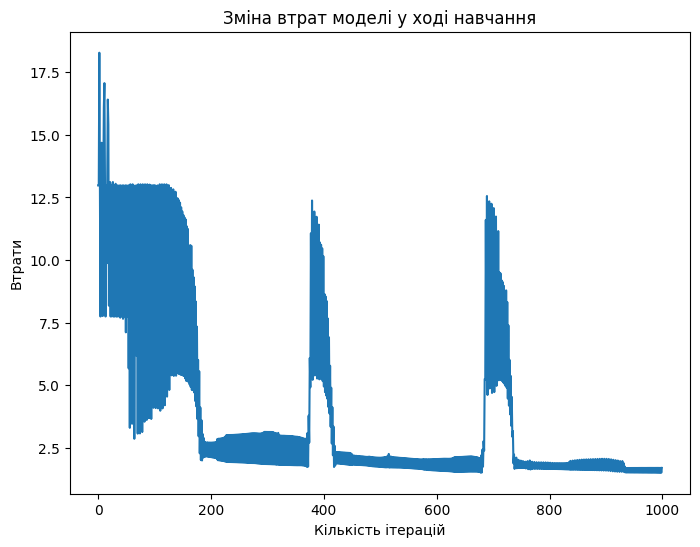

In [535]:
lr = 0.001
n_iters = 1000

model = LogisticRegression(lr, n_iters)
w_trained, b_trained, costs = model.fit(X_train, y_train)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.title("Зміна втрат моделі у ході навчання")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Втрати")
plt.show()

# Тестування моделі

In [536]:
y_pred = model.predict(X_test)

In [537]:
y_pred = np.array(y_pred)

In [538]:
y_pred.shape

(114,)

In [539]:
def accuracy(y_pred, y_true):
  return np.sum(y_pred == y_true) / y_true.size

In [540]:
acc = accuracy(y_pred, y_test)
acc

0.9122807017543859

In [541]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

In [542]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [543]:
cost_test = model.evaluate(X_test, y_test)
print(f"Усереднена втрата моделі на тестовій вибірці {cost_test}")

Усереднена втрата моделі на тестовій вибірці 1.4446110249086204




Завдання завершено.
